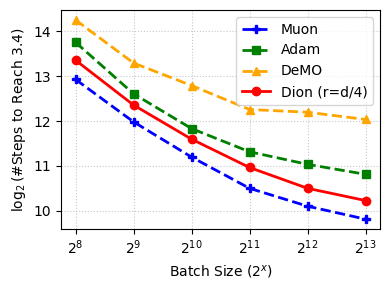

Plot saved at: cbs/cbs.pdf


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# ─── YOUR RESULTS HERE ───────────────────────────────────────────────────────────
results = {
    "Muon": {256: 7800, 512: 4050, 1024: 2350, 2048: 1450, 4096: 1100, 8192: 900},
    # 299 Global batch size 256: target reached at iteration 7800
    # 300 Global batch size 512: target reached at iteration 4050
    # 301 Global batch size 1024: target reached at iteration 2350
    # 302 Global batch size 2048: target reached at iteration 1450
    # 303 Global batch size 4096: target reached at iteration 1100
    # 304 Global batch size 8192: target reached at iteration 900
    "Adam": {256: 13850, 512: 6250, 1024: 3650, 2048: 2550, 4096: 2100, 8192: 1800},
    # Global batch size 256: target reached at iteration 13850
    # 234 Global batch size 512: target reached at iteration 6250
    # 235 Global batch size 1024: target reached at iteration 3650
    # 236 Global batch size 2048: target reached at iteration 2550
    # 237 Global batch size 4096: target reached at iteration 2100
    # 238 Global batch size 8192: target reached at iteration 1800
    "DeMO": {256: 19550, 512: 10050, 1024: 7100, 2048: 4900, 4096: 4700, 8192: 4200},
    # 233 Global batch size 256: target reached at iteration 19550
    # 234 Global batch size 512: target reached at iteration 10050
    # 235 Global batch size 1024: target reached at iteration 7100
    # 236 Global batch size 2048: target reached at iteration 4900
    # 237 Global batch size 4096: target reached at iteration 4700
    # 238 Global batch size 8192: target reached at iteration 4200
    #########
    #    "Dion (r=d)":       {256: 8200,  512: 4200,  1024: 2300, 2048: 1350, 4096: 1000, 8192: 750},
    # 486 Global batch size 256: target reached at iteration 8200
    # 487 Global batch size 512: target reached at iteration 4200
    # 488 Global batch size 1024: target reached at iteration 2300
    # 489 Global batch size 2048: target reached at iteration 1350
    # 490 Global batch size 4096: target reached at iteration 1000
    # 491 Global batch size 8192: target reached at iteration 750
    #    "Dion (r=d/2)":     {256: 8600, 512: 4550,  1024: 2500, 2048: 1600, 4096: 1100, 8192: 900},
    # 486 Global batch size 256: target reached at iteration 8600
    # 487 Global batch size 512: target reached at iteration 4550
    # 488 Global batch size 1024: target reached at iteration 2500
    # 489 Global batch size 2048: target reached at iteration 1600
    # 490 Global batch size 4096: target reached at iteration 1100
    # 491 Global batch size 8192: target reached at iteration 900
    "Dion (r=d/4)": {
        256: 10500,
        512: 5250,
        1024: 3100,
        2048: 2000,
        4096: 1450,
        8192: 1200,
    },
    # 486 Global batch size 256: target reached at iteration 10500
    # 487 Global batch size 512: target reached at iteration 5250
    # 488 Global batch size 1024: target reached at iteration 3100
    # 489 Global batch size 2048: target reached at iteration 2000
    # 490 Global batch size 4096: target reached at iteration 1450
    # 491 Global batch size 8192: target reached at iteration 1200
    #    "Dion (r=d/8)":     {256: 12450, 512: 6650,  1024: 4100, 2048: 2750, 4096: 2150, 8192: 1750},
    # 486 Global batch size 256: target reached at iteration 12450
    # 487 Global batch size 512: target reached at iteration 6650
    # 488 Global batch size 1024: target reached at iteration 4100
    # 489 Global batch size 2048: target reached at iteration 2750
    # 490 Global batch size 4096: target reached at iteration 2150
    # 491 Global batch size 8192: target reached at iteration 1750
    #    "Dion (r=d/16)":    {256: 14300, 512: 8550, 1024: 5750, 2048: 3950, 4096: 3250, 8192: 2700},
    # 486 Global batch size 256: target reached at iteration 14300
    # 487 Global batch size 512: target reached at iteration 8550
    # 488 Global batch size 1024: target reached at iteration 5750
    # 489 Global batch size 2048: target reached at iteration 3950
    # 490 Global batch size 4096: target reached at iteration 3250
    # 491 Global batch size 8192: target reached at iteration 2700
}

# ─── SET YOUR SAVE PATH ─────────────────────────────────────────────────────────
save_path = "cbs/"
os.makedirs(save_path, exist_ok=True)

# ─── STYLES ──────────────────────────────────────────────────────────────────────
custom_styles = {
    "Muon": {"color": "blue", "linestyle": "--", "marker": "P", "linewidth": 2},
    "Adam": {"color": "green", "linestyle": "--", "marker": "s", "linewidth": 2},
    "DeMO": {"color": "orange", "linestyle": "--", "marker": "^", "linewidth": 2},
    "Dion (r=d/4)": {"color": "red", "linestyle": "-", "marker": "o", "linewidth": 2},
}


# ─── PLOT ────────────────────────────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(4, 3))

first_dion = True  # flag to track the first Dion for legend
for optimizer, data in results.items():
    bs = np.array(sorted(data.keys()))
    iters = np.array([data[b] for b in bs])

    if optimizer in custom_styles:
        style = custom_styles[optimizer]
        label = optimizer

    # Plot
    ax.plot(np.log2(bs), np.log2(iters), label=label, **style)


# ─── AXIS CONFIG ────────────────────────────────────────────────────────────────
xticks = np.log2(sorted(next(iter(results.values())).keys()))
ax.set_xticks(xticks)
ax.set_xticklabels(
    [r"$2^8$", r"$2^9$", r"$2^{10}$", r"$2^{11}$", r"$2^{12}$", r"$2^{13}$"]
)

ax.set_xlabel("Batch Size ($2^x$)")
ax.set_ylabel(r"$\log_2(\text{#Steps to Reach 3.4})$")
ax.grid(True, linestyle=":", alpha=0.7)
ax.legend()
plt.tight_layout()

# ─── SAVE ────────────────────────────────────────────────────────────────────────
plot_filename = os.path.join(save_path, "cbs.pdf")
plt.savefig(plot_filename, format="pdf", bbox_inches="tight")
plt.show()

print(f"Plot saved at: {plot_filename}")

Extracted fraction from Dion (r=d): 1
Extracted fraction from Dion (r=d/2): 1/2
Extracted fraction from Dion (r=d/4): 1/4
Extracted fraction from Dion (r=d/8): 1/8
Extracted fraction from Dion (r=d/16): 1/16


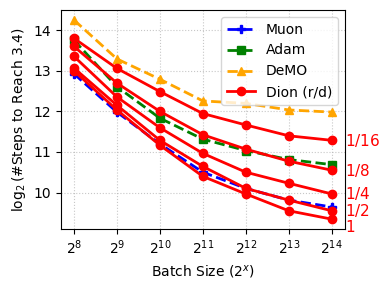

Plot saved at: dion/cbs.pdf


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# ─── YOUR RESULTS HERE ───────────────────────────────────────────────────────────
results = {
    "Muon": {
        256: 7800,
        512: 4050,
        1024: 2350,
        2048: 1450,
        4096: 1100,
        8192: 900,
        16384: 800,
    },
    # 299 Global batch size 256: target reached at iteration 7800
    # 300 Global batch size 512: target reached at iteration 4050
    # 301 Global batch size 1024: target reached at iteration 2350
    # 302 Global batch size 2048: target reached at iteration 1450
    # 303 Global batch size 4096: target reached at iteration 1100
    # 304 Global batch size 8192: target reached at iteration 900
    "Adam": {
        256: 13850,
        512: 6250,
        1024: 3650,
        2048: 2550,
        4096: 2100,
        8192: 1800,
        16384: 1650,
    },
    # Global batch size 256: target reached at iteration 13850
    # 234 Global batch size 512: target reached at iteration 6250
    # 235 Global batch size 1024: target reached at iteration 3650
    # 236 Global batch size 2048: target reached at iteration 2550
    # 237 Global batch size 4096: target reached at iteration 2100
    # 238 Global batch size 8192: target reached at iteration 1800
    "DeMO": {
        256: 19550,
        512: 10050,
        1024: 7100,
        2048: 4900,
        4096: 4700,
        8192: 4200,
        16384: 4050,
    },
    # 233 Global batch size 256: target reached at iteration 19550
    # 234 Global batch size 512: target reached at iteration 10050
    # 235 Global batch size 1024: target reached at iteration 7100
    # 236 Global batch size 2048: target reached at iteration 4900
    # 237 Global batch size 4096: target reached at iteration 4700
    # 238 Global batch size 8192: target reached at iteration 4200
    #########
    "Dion (r=d)": {
        256: 8200,
        512: 4200,
        1024: 2300,
        2048: 1350,
        4096: 1000,
        8192: 750,
        16384: 650,
    },
    # 486 Global batch size 256: target reached at iteration 8200
    # 487 Global batch size 512: target reached at iteration 4200
    # 488 Global batch size 1024: target reached at iteration 2300
    # 489 Global batch size 2048: target reached at iteration 1350
    # 490 Global batch size 4096: target reached at iteration 1000
    # 491 Global batch size 8192: target reached at iteration 750
    "Dion (r=d/2)": {
        256: 8600,
        512: 4550,
        1024: 2500,
        2048: 1600,
        4096: 1100,
        8192: 900,
        16384: 750,
    },
    # 486 Global batch size 256: target reached at iteration 8600
    # 487 Global batch size 512: target reached at iteration 4550
    # 488 Global batch size 1024: target reached at iteration 2500
    # 489 Global batch size 2048: target reached at iteration 1600
    # 490 Global batch size 4096: target reached at iteration 1100
    # 491 Global batch size 8192: target reached at iteration 900
    "Dion (r=d/4)": {
        256: 10500,
        512: 5250,
        1024: 3100,
        2048: 2000,
        4096: 1450,
        8192: 1200,
        16384: 1000,
    },
    # 486 Global batch size 256: target reached at iteration 10500
    # 487 Global batch size 512: target reached at iteration 5250
    # 488 Global batch size 1024: target reached at iteration 3100
    # 489 Global batch size 2048: target reached at iteration 2000
    # 490 Global batch size 4096: target reached at iteration 1450
    # 491 Global batch size 8192: target reached at iteration 1200
    "Dion (r=d/8)": {
        256: 12450,
        512: 6650,
        1024: 4100,
        2048: 2750,
        4096: 2150,
        8192: 1750,
        16384: 1500,
    },
    # 486 Global batch size 256: target reached at iteration 12450
    # 487 Global batch size 512: target reached at iteration 6650
    # 488 Global batch size 1024: target reached at iteration 4100
    # 489 Global batch size 2048: target reached at iteration 2750
    # 490 Global batch size 4096: target reached at iteration 2150
    # 491 Global batch size 8192: target reached at iteration 1750
    "Dion (r=d/16)": {
        256: 14300,
        512: 8550,
        1024: 5750,
        2048: 3950,
        4096: 3250,
        8192: 2700,
        16384: 2500,
    },
    # 486 Global batch size 256: target reached at iteration 14300
    # 487 Global batch size 512: target reached at iteration 8550
    # 488 Global batch size 1024: target reached at iteration 5750
    # 489 Global batch size 2048: target reached at iteration 3950
    # 490 Global batch size 4096: target reached at iteration 3250
    # 491 Global batch size 8192: target reached at iteration 2700
}

# ─── SET YOUR SAVE PATH ─────────────────────────────────────────────────────────
save_path = "dion/"
os.makedirs(save_path, exist_ok=True)

# ─── STYLES ──────────────────────────────────────────────────────────────────────
custom_styles = {
    "Muon": {"color": "blue", "linestyle": "--", "marker": "P", "linewidth": 2},
    "Adam": {"color": "green", "linestyle": "--", "marker": "s", "linewidth": 2},
    "DeMO": {"color": "orange", "linestyle": "--", "marker": "^", "linewidth": 2},
}
dion_color = "red"
dion_marker = "o"
dion_linestyle = "-"


# ─── HELPER FUNCTION ─────────────────────────────────────────────────────────────
def extract_fraction_label(opt_name: str) -> str:
    match = re.search(r"d/(\d+)", opt_name)

    if match:
        return f"1/{match.group(1)}"

    return f"1"


# ─── PLOT ────────────────────────────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(4, 3))

first_dion = True  # flag to track the first Dion for legend
for optimizer, data in results.items():
    bs = np.array(sorted(data.keys()))
    iters = np.array([data[b] for b in bs])

    if optimizer in custom_styles:
        style = custom_styles[optimizer]
        label = optimizer
    elif "Dion" in optimizer:
        style = {
            "color": dion_color,
            "linestyle": dion_linestyle,
            "marker": dion_marker,
            "linewidth": 2,
        }
        label = "Dion (r/d)" if first_dion else "_nolegend_"
        first_dion = False
    else:
        style = {"color": "black", "linestyle": "-", "marker": "x", "linewidth": 2}
        label = optimizer

    # Plot
    ax.plot(np.log2(bs), np.log2(iters), label=label, **style)

    # Label Dion fractions
    # Label Dion fractions
    if "Dion" in optimizer:

        x_vals = np.log2(bs)
        y_vals = np.log2(iters)
        frac = extract_fraction_label(optimizer)
        print(f"Extracted fraction from {optimizer}: {frac}")

        if frac == "1":
            label_text = rf"$1$"
            x_label = x_vals[-1] + 0.3
            y_label = y_vals[-1] - 0.2
        elif frac == "1/2":
            label_text = rf"$1/2$"
            x_label = x_vals[-1] + 0.3
            y_label = y_vals[-1] + 0.0
        else:
            denom = frac.split("/")[-1]
            label_text = rf"$1/{denom}$"
            x_label = x_vals[-1] + 0.3
            y_label = y_vals[-1] + 0.0

        ax.text(
            x_label,
            y_label,
            label_text,
            color=dion_color,
            fontsize=11,
            va="center",
            ha="left",
        )

    # if "Dion" in optimizer:
    #     frac = extract_fraction_label(optimizer)
    #     if frac:
    #         x_last = np.log2(bs[-1])
    #         y_last = np.log2(iters[-1])
    #         ax.text(x_last + 0.05, y_last, frac, color=dion_color, fontsize=10, va="center")

# ─── AXIS CONFIG ────────────────────────────────────────────────────────────────
xticks = np.log2(sorted(next(iter(results.values())).keys()))
ax.set_xticks(xticks)
ax.set_xticklabels(
    [
        r"$2^8$",
        r"$2^9$",
        r"$2^{10}$",
        r"$2^{11}$",
        r"$2^{12}$",
        r"$2^{13}$",
        r"$2^{14}$",
    ]
)

ax.set_xlabel("Batch Size ($2^x$)")
ax.set_ylabel(r"$\log_2(\text{#Steps to Reach 3.4})$")
ax.grid(True, linestyle=":", alpha=0.7)
ax.legend()
plt.tight_layout()

# ─── SAVE ────────────────────────────────────────────────────────────────────────
plot_filename = os.path.join(save_path, "cbs.pdf")
plt.savefig(plot_filename, format="pdf", bbox_inches="tight")
plt.show()

print(f"Plot saved at: {plot_filename}")

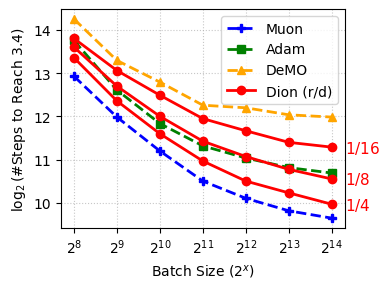

Plot saved at: dion/cbs.pdf


In [2]:
# Define the subset of Dion plots to include
selected_dion = ["Dion (r=d/4)", "Dion (r=d/8)", "Dion (r=d/16)"]

fig, ax = plt.subplots(figsize=(4, 3))

first_dion = True  # flag for legend entry
for optimizer, data in results.items():
    if optimizer.startswith("Dion") and optimizer not in selected_dion:
        continue  # skip unwanted Dion variants

    bs = np.array(sorted(data.keys()))
    iters = np.array([data[b] for b in bs])

    if optimizer in custom_styles:
        style = custom_styles[optimizer]
        label = optimizer
    elif "Dion" in optimizer:
        style = {
            "color": dion_color,
            "linestyle": dion_linestyle,
            "marker": dion_marker,
            "linewidth": 2,
        }
        label = "Dion (r/d)" if first_dion else "_nolegend_"
        first_dion = False
    else:
        style = {"color": "black", "linestyle": "-", "marker": "x", "linewidth": 2}
        label = optimizer

    ax.plot(np.log2(bs), np.log2(iters), label=label, **style)

    if "Dion" in optimizer:
        x_vals = np.log2(bs)
        y_vals = np.log2(iters)
        frac = extract_fraction_label(optimizer)

        denom = frac.split("/")[-1]
        label_text = rf"$1/{denom}$"
        x_label = x_vals[-1] + 0.3
        y_label = y_vals[-1]

        ax.text(
            x_label,
            y_label,
            label_text,
            color=dion_color,
            fontsize=11,
            va="center",
            ha="left",
        )

# Axis labels and grid
xticks = np.log2(sorted(next(iter(results.values())).keys()))
ax.set_xticks(xticks)
ax.set_xticklabels(
    [
        r"$2^8$",
        r"$2^9$",
        r"$2^{10}$",
        r"$2^{11}$",
        r"$2^{12}$",
        r"$2^{13}$",
        r"$2^{14}$",
    ]
)

ax.set_xlabel("Batch Size ($2^x$)")
ax.set_ylabel(r"$\log_2(\text{#Steps to Reach 3.4})$")
ax.grid(True, linestyle=":", alpha=0.7)
ax.legend()
plt.tight_layout()

# Save
plot_filename = os.path.join(save_path, "cbs.pdf")
plt.savefig(plot_filename, format="pdf", bbox_inches="tight")
plt.show()

print(f"Plot saved at: {plot_filename}")

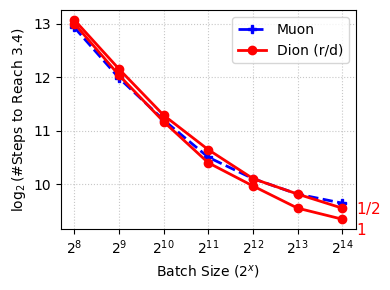

Plot saved at: dion/cbs_full.pdf


In [3]:
# Define the subset of Dion plots to include
selected_dion = ["Dion (r=d)", "Dion (r=d/2)"]
selected_non_dion = ["Muon"]

fig, ax = plt.subplots(figsize=(4, 3))

first_dion = True  # flag for legend entry
for optimizer, data in results.items():
    if optimizer.startswith("Dion") and optimizer not in selected_dion:
        continue  # skip unwanted Dion variants
    elif not optimizer.startswith("Dion") and optimizer not in selected_non_dion:
        continue  # skip unwanted non-Dion optimizers

    bs = np.array(sorted(data.keys()))
    iters = np.array([data[b] for b in bs])

    if optimizer in custom_styles:
        style = custom_styles[optimizer]
        label = optimizer
    elif "Dion" in optimizer:
        style = {
            "color": dion_color,
            "linestyle": dion_linestyle,
            "marker": dion_marker,
            "linewidth": 2,
        }
        label = "Dion (r/d)" if first_dion else "_nolegend_"
        first_dion = False
    else:
        style = {"color": "black", "linestyle": "-", "marker": "x", "linewidth": 2}
        label = optimizer

    ax.plot(np.log2(bs), np.log2(iters), label=label, **style)

    if "Dion" in optimizer:
        x_vals = np.log2(bs)
        y_vals = np.log2(iters)
        frac = extract_fraction_label(optimizer)

        if frac == "1":
            label_text = rf"$1$"
            x_label = x_vals[-1] + 0.3
            y_label = y_vals[-1] - 0.2
        elif frac == "1/2":
            label_text = rf"$1/2$"
            x_label = x_vals[-1] + 0.3
            y_label = y_vals[-1] + 0.0
        else:
            denom = frac.split("/")[-1]
            label_text = rf"$1/{denom}$"
            x_label = x_vals[-1] + 0.3
            y_label = y_vals[-1] + 0.0

        # denom = frac.split("/")[-1]
        # label_text = fr"$1/{denom}$"
        # x_label = x_vals[-1] + 0.3
        # y_label = y_vals[-1]

        ax.text(
            x_label,
            y_label,
            label_text,
            color=dion_color,
            fontsize=11,
            va="center",
            ha="left",
        )

# Axis labels and grid
xticks = np.log2(sorted(next(iter(results.values())).keys()))
ax.set_xticks(xticks)
ax.set_xticklabels(
    [
        r"$2^8$",
        r"$2^9$",
        r"$2^{10}$",
        r"$2^{11}$",
        r"$2^{12}$",
        r"$2^{13}$",
        r"$2^{14}$",
    ]
)

ax.set_xlabel("Batch Size ($2^x$)")
ax.set_ylabel(r"$\log_2(\text{#Steps to Reach 3.4})$")
ax.grid(True, linestyle=":", alpha=0.7)
ax.legend()
plt.tight_layout()

# Save
plot_filename = os.path.join(save_path, "cbs_full.pdf")
plt.savefig(plot_filename, format="pdf", bbox_inches="tight")
plt.show()

print(f"Plot saved at: {plot_filename}")

In [ ]:
# Previous results:

results = {
    "Muon": {256: 9350, 512: 4450, 1024: 2500, 2048: 1650, 4096: 1250, 8192: 1050},
    "Adam": {256: 15350, 512: 7050, 1024: 4050, 2048: 2800, 4096: 2300, 8192: 2150},
    "DeMO": {256: 26250, 512: 13550, 1024: 8500, 2048: 6400, 4096: 5900, 8192: 5550},
    "Dion (r=d)": {256: 9550, 512: 4750, 1024: 2600, 2048: 1600, 4096: 1200, 8192: 950},
    "Dion (r=d/2)": {
        256: 10350,
        512: 5050,
        1024: 2850,
        2048: 1800,
        4096: 1300,
        8192: 1050,
    },
    "Dion (r=d/4)": {
        256: 12450,
        512: 6400,
        1024: 3400,
        2048: 2300,
        4096: 1700,
        8192: 1400,
    },
    "Dion (r=d/8)": {
        256: 15950,
        512: 8200,
        1024: 4800,
        2048: 3250,
        4096: 2500,
        8192: 2050,
    },
    "Dion (r=d/16)": {
        256: 20000,
        512: 10450,
        1024: 6700,
        2048: 4850,
        4096: 3850,
        8192: 3350,
    },
}

In [ ]:
results = {
    "Muon": {256: 7800, 512: 4050, 1024: 2350, 2048: 1450, 4096: 1100, 8192: 900},
    "Adam": {256: 13850, 512: 6250, 1024: 3650, 2048: 2550, 4096: 2100, 8192: 1800},
    "DeMO": {256: 19550, 512: 10050, 1024: 7100, 2048: 4900, 4096: 4700, 8192: 4200},
    #########
    "Dion (r=d)": {256: 8200, 512: 4200, 1024: 2300, 2048: 1350, 4096: 1000, 8192: 750},
    "Dion (r=d/2)": {
        256: 8600,
        512: 4550,
        1024: 2500,
        2048: 1600,
        4096: 1100,
        8192: 900,
    },
    "Dion (r=d/4)": {
        256: 10500,
        512: 5250,
        1024: 3100,
        2048: 2000,
        4096: 1450,
        8192: 1200,
    },
    "Dion (r=d/8)": {
        256: 12450,
        512: 6650,
        1024: 4100,
        2048: 2750,
        4096: 2150,
        8192: 1750,
    },
    "Dion (r=d/16)": {
        256: 14300,
        512: 8550,
        1024: 5750,
        2048: 3950,
        4096: 3250,
        8192: 2700,
    },
}